---
title: "LOCZCIT-IQR: Análise de ZCIT com Dados ERA5"
author: "Elivaldo Rocha"
format:
  pdf:
    # --- Layout da Página ---
    papersize: letter      # Tamanho do papel
    geometry:
      - landscape        # Orientação horizontal
      - hmargin=1cm      # Margens esquerda e direita
      - vmargin=1.5cm    # Margens superior e inferior

    # --- Fonte e Código ---
    fontsize: 10pt         # Tamanho da fonte (10pt, 11pt, 12pt)
    code-block-wrap: true  # Quebra linhas longas nos blocos de código

    # --- Engine de PDF ---
    pdf-engine: xelatex    # Boa engine para fontes e acentos

    # --- Tabela de Conteúdos (Opcional) ---
    toc: true              # Adiciona um sumário no início
    toc-depth: 3           # Profundidade do sumário (ex: 1.1.1)
    number-sections: true  # Numera as seções (1, 1.1, 2, etc.)
---

# Análise por Pentadas Flexíveis

### Caso 1: Analisa a ZCIT para o período especificado pelo usuário.
processor.create_recent_average()

In [1]:
import loczcit_iqr
loczcit_iqr.check_modules()

✅ 18 fontes da biblioteca loczcit_iqr registradas com sucesso.
🎨 Estilo tipográfico profissional loczcit_iqr aplicado.
🌊 LOCZCIT-IQR v0.0.1 carregada!
   📖 Use lz.quick_start_guide() para começar
   🔧 Use lz.check_modules() para verificar módulos
🌊 LOCZCIT-IQR - Status dos Módulos

📦 CORE:
   ✅ data_loader (NOAA)
   ✅ data_loader_era5 (ERA5)
   ✅ processor
   ✅ iqr_detector
   ✅ spline_interpolator
   ✅ climatologia
   ✅ Status core: Completo

📦 PLOTTING:
   ✅ visualizer
   ✅ style
   ✅ Status plotting: Completo

📦 UTILS:
   ✅ pentadas
   ✅ validators
   ✅ Status utils: Completo

💡 RECOMENDAÇÕES:
   🎉 Todos os módulos estão funcionando perfeitamente!

📚 Para começar, use: lz.quick_start_guide()


{'core': {'data_loader (NOAA)': True,
  'data_loader_era5 (ERA5)': True,
  'processor': True,
  'iqr_detector': True,
  'spline_interpolator': True,
  'climatologia': True,
  'all_available': True},
 'plotting': {'visualizer': True, 'style': True, 'all_available': True},
 'utils': {'pentadas': True, 'validators': True, 'all_available': True}}

2025-10-18 19:49:05,759 - loczcit_iqr.core.data_loader_era5 - INFO - Cliente CDS inicializado com credenciais fornecidas
2025-10-18 19:49:05,760 - loczcit_iqr.core.data_loader_era5 - INFO - ERA5DataLoader inicializado (cache: era5_cache)
2025-10-18 19:49:05,762 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
Carregando dados ERA5 para o período: 2025-09-09 a 2025-09-13
2025-10-18 19:49:05,763 - loczcit_iqr.core.data_loader_era5 - INFO - Carregando dados ERA5: 2025-09-09 a 2025-09-13
2025-10-18 19:49:05,764 - loczcit_iqr.core.data_loader_era5 - INFO - Usando arquivo do cache: era5_cache\era5_olr_noaa_format_20250909_20250913_area_17.00_-80.00_-12.00_4.00.nc
2025-10-18 19:49:05,775 - loczcit_iqr.core.data_loader_era5 - INFO - Dados carregados do cache com sucesso

Processando dados do período customizado...
2025-10-18 19:49:05,777 - loczcit_iqr.core.processor - INFO - Calculando mean 

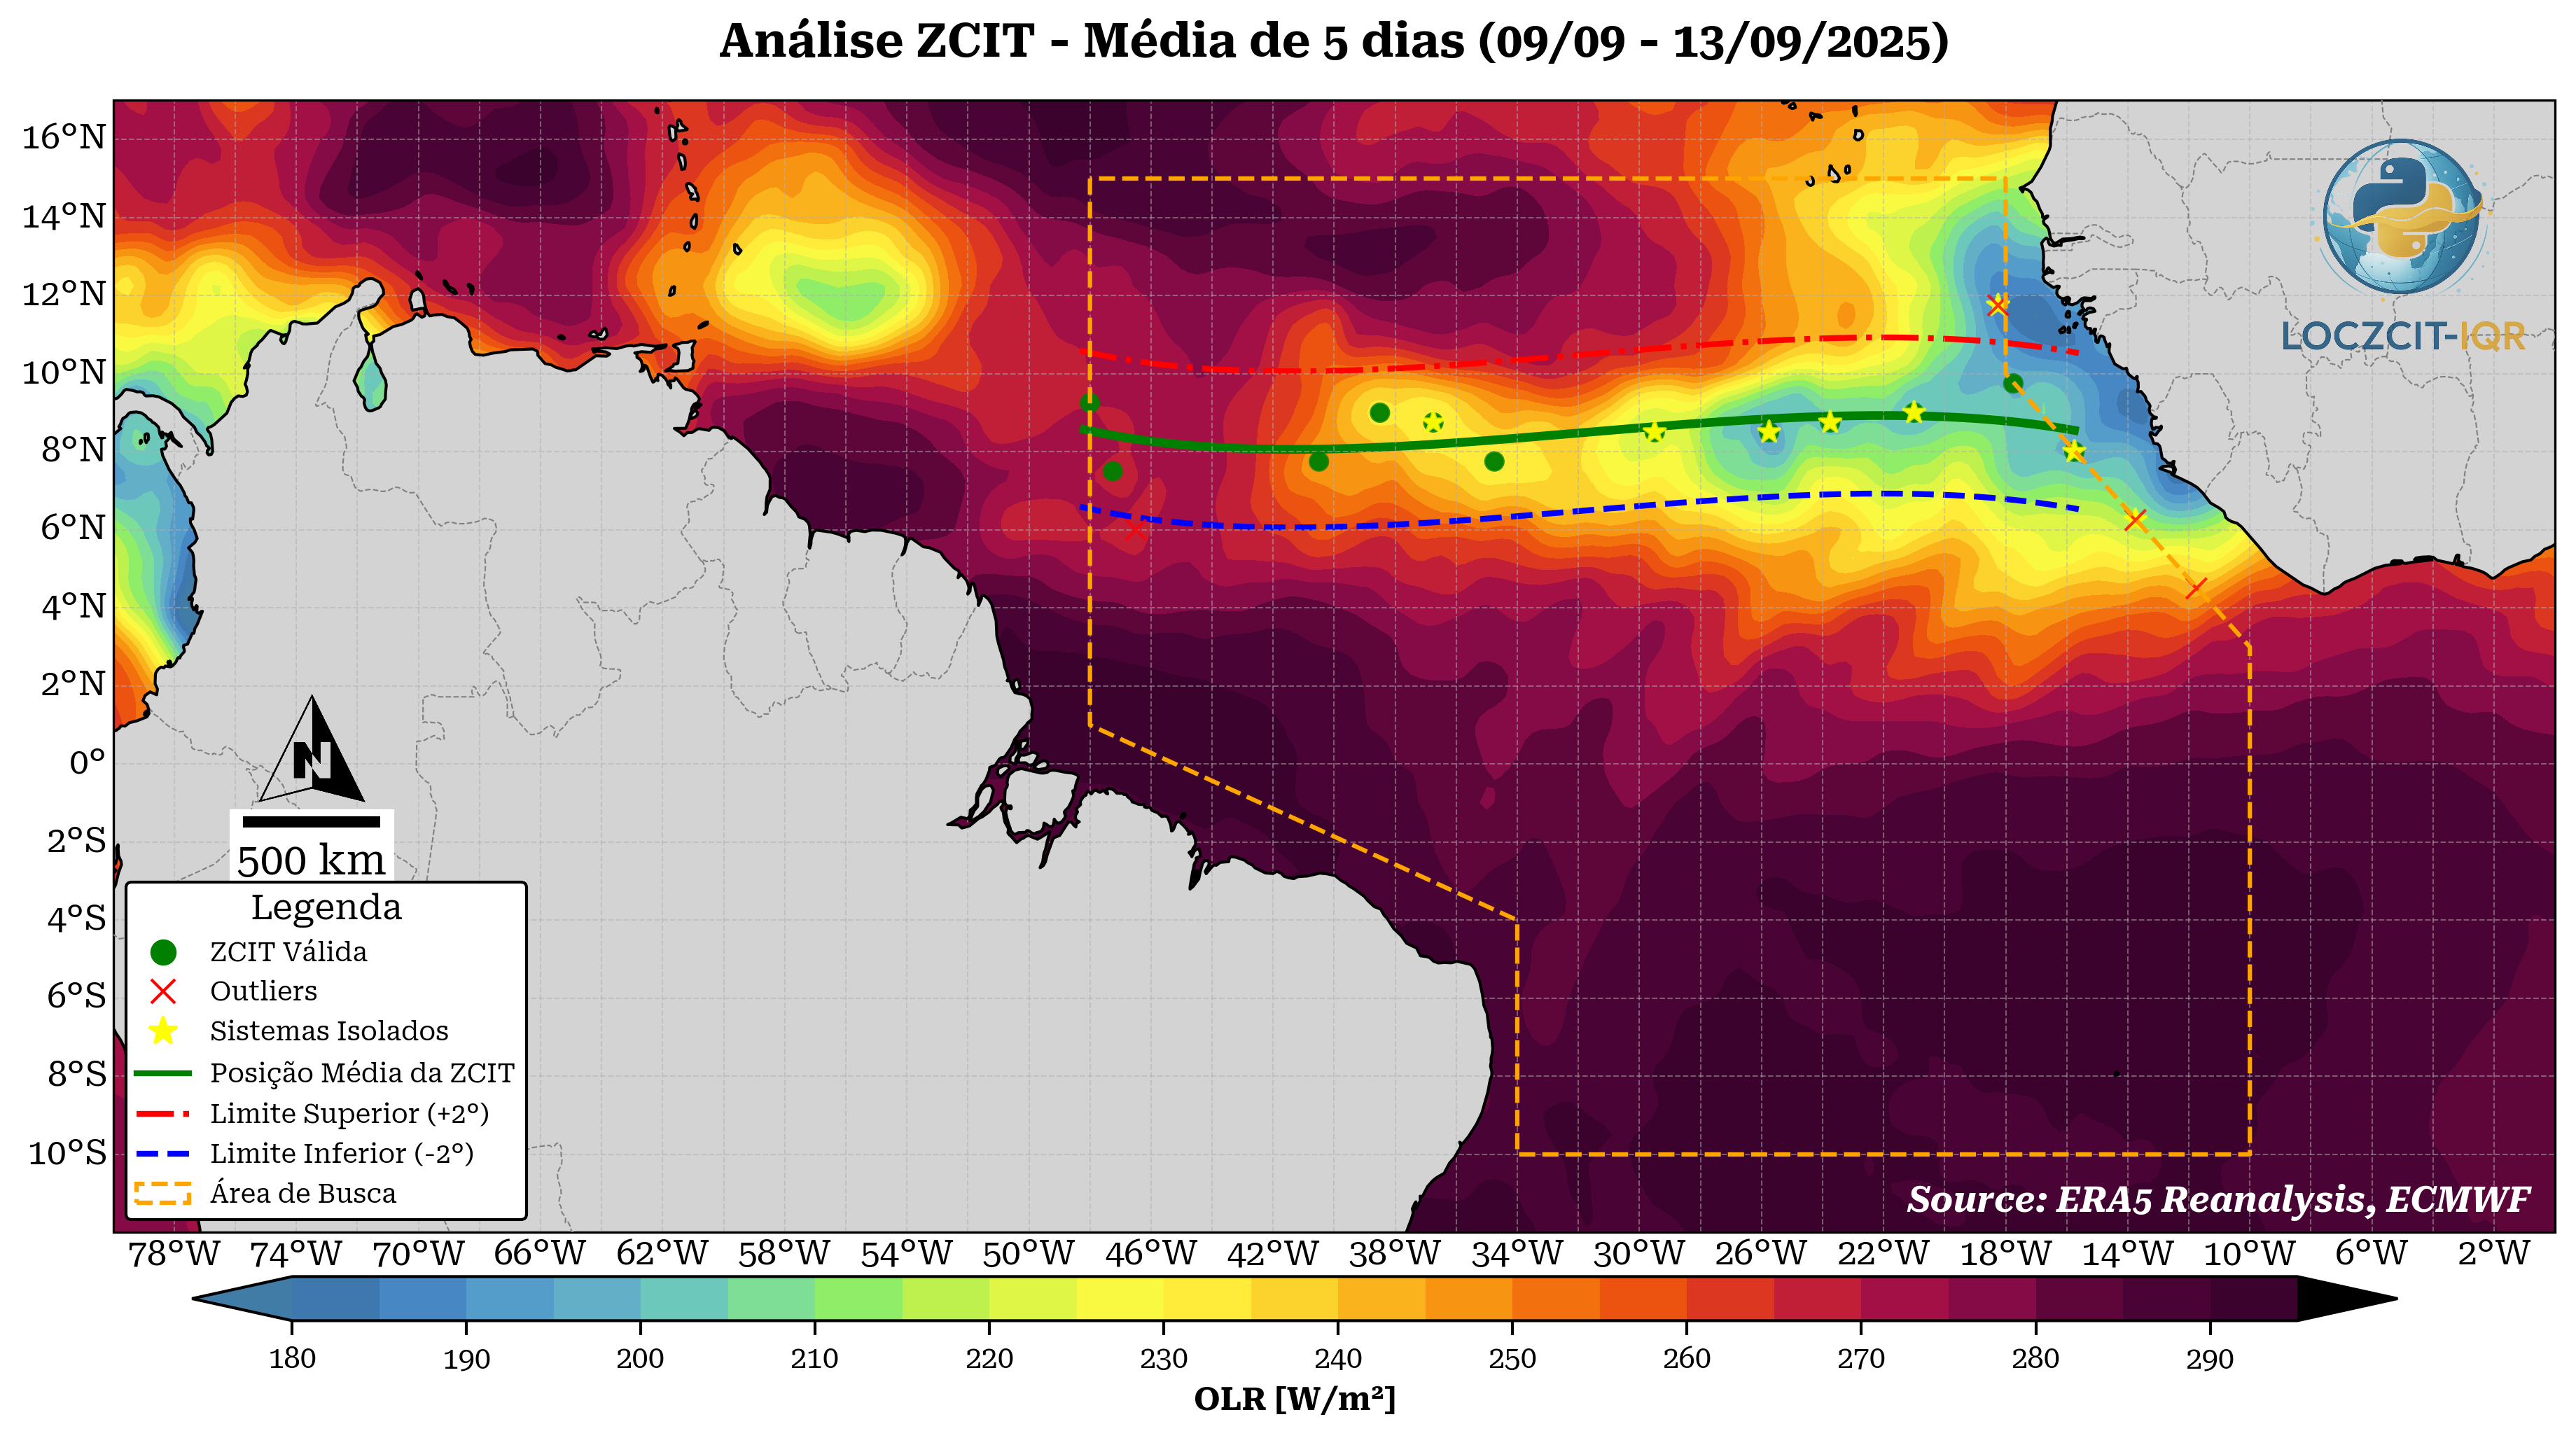

In [2]:
"""
Análise ZCIT com Pentadas Flexíveis - Usando Dados ERA5
=======================================================

1. Define as datas específicas do período desejado
2. Carrega exatamente esse período (não mais dados do que o necessário) para 
   menor espera do usuário perante os servidores do ECMWF
3. Usa create_recent_average()
"""

# ============================================================================
# IMPORTS
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

from loczcit_iqr.core.data_loader_era5 import ERA5DataLoader 
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import (
    SplineInterpolator, 
    SplineParameters, 
    InterpolationMethod
)
from loczcit_iqr.plotting.visualizer import ZCITVisualizer

# ============================================================================
# 0. CONFIGURAÇÃO DO ERA5
# ============================================================================

CDS_URL = "https://cds.climate.copernicus.eu/api"

# Carregar credenciais do arquivo .env
dotenv_path = os.path.join('notebooks', '.env')
load_dotenv(dotenv_path=dotenv_path)
CDS_KEY = os.getenv("CDS_KEY")

# ============================================================================
# 1. DEFINIÇÃO DO PERÍODO CUSTOMIZADO 🎯
# ============================================================================

# 🎯 Definir as datas específicas da pentada
data_inicio = "2025-09-09"  # Início da pentada
data_fim = "2025-09-13"     # Fim da pentada (5 dias: 9, 10, 11, 12, 13)

# ============================================================================
# 2. CARREGAMENTO DOS DADOS
# ============================================================================

loader = ERA5DataLoader(cds_url=CDS_URL, cds_key=CDS_KEY)
processor = DataProcessor()

print(f"Carregando dados ERA5 para o período: {data_inicio} a {data_fim}")

# 🎯 Carregar exatamente o período desejado
olr_data = loader.load_data(
    start_date=data_inicio,
    end_date=data_fim
)

print("\nProcessando dados do período customizado...")

# 🎯 Usar create_recent_average() para o período específico
# Esta função calcula a média do período especificado
olr_periodo = processor.create_recent_average(
    olr_data, 
    start_date=data_inicio,
    end_date=data_fim,
    method='mean'  # Pode usar 'median', 'min', 'max' também
)

print("Período customizado processado com sucesso.")

# ============================================================================
# 3. ANÁLISE DA ZCIT
# ============================================================================

print(f"\nIniciando análise ZCIT para o período customizado...")

detector = IQRDetector(constant=0.75)
interpolator = SplineInterpolator()

# Buscar mínimos de OLR
min_coords = processor.find_minimum_coordinates(
    data_array=olr_periodo, 
    method='column_minimum', 
    search_radius=1
)

# Detectar outliers
coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)

# Buscar sistemas convectivos
sistemas_convectivos = processor.find_minimum_coordinates(
    data_array=olr_periodo, 
    threshold=230, 
    method='local_minimum', 
    search_radius=2
)

# Interpolar a linha da ZCIT
params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE, 
    smooth_factor='high', 
    degree=3, 
    num_points_output=100, 
    extrapolate_flag=True, 
    reference_latitude=0
)

zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)

print("Análise concluída.")

# ============================================================================
# 4. VISUALIZAÇÃO - PEQUENO AJUSTE NO TÍTULO
# ============================================================================

# 🎯 MUDANÇA 4: Título reflete o período customizado
start_str = olr_periodo.attrs['period_start']
end_str = olr_periodo.attrs['period_end']
start_date_title = pd.to_datetime(start_str)
end_date_title = pd.to_datetime(end_str)

# Calcular o número de dias para o título
num_dias = (end_date_title - start_date_title).days + 1

titulo_customizado = (
    f"Análise ZCIT - Média de {num_dias} dias "
    f"({start_date_title.strftime('%d/%m')} - {end_date_title.strftime('%d/%m/%Y')})"
)

# ✅ Visualização permanece IDÊNTICA
viz = ZCITVisualizer(template='publication')

fig, ax = viz.plot_complete_analysis(
    olr_data=olr_periodo,
    title=titulo_customizado,
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    credits="ERA5",
    save_path=None  # ou 'zcit_pentada_customizada.png' para salvar
)

plt.show()


### Caso 2: Executar análise da ZCIT sobre os cinco dias mais recentes do conjunto de dados.

processor.process_latest_period()

2025-10-18 19:49:07,489 - loczcit_iqr.core.data_loader_era5 - INFO - Cliente CDS inicializado com credenciais fornecidas
2025-10-18 19:49:07,489 - loczcit_iqr.core.data_loader_era5 - INFO - ERA5DataLoader inicializado (cache: era5_cache)
2025-10-18 19:49:07,491 - loczcit_iqr.core.data_loader_era5 - INFO - Removido: era5_combined_20240101_20241231.nc
2025-10-18 19:49:07,492 - loczcit_iqr.core.data_loader_era5 - INFO - Removido: era5_combined_20250901_20251008.nc
2025-10-18 19:49:07,493 - loczcit_iqr.core.data_loader_era5 - INFO - Removido: era5_olr_noaa_format_20240101_20241231_area_17.00_-80.00_-12.00_4.00.nc
2025-10-18 19:49:07,494 - loczcit_iqr.core.data_loader_era5 - INFO - Removido: era5_olr_noaa_format_20250901_20251008_area_17.00_-80.00_-12.00_4.00.nc
2025-10-18 19:49:07,495 - loczcit_iqr.core.data_loader_era5 - ERROR - Erro ao remover era5_cache\era5_olr_noaa_format_20250909_20250913_area_17.00_-80.00_-12.00_4.00.nc: [WinError 32] O arquivo já está sendo usado por outro processo

2025-10-18 19:49:08,987 INFO Request ID is f29cdfb3-d4f3-4892-b823-96d6035b0fdf
2025-10-18 19:49:09,219 INFO status has been updated to accepted
2025-10-18 19:49:31,673 INFO status has been updated to running
2025-10-18 19:49:43,300 INFO status has been updated to successful
                                                                                         

2025-10-18 19:49:47,603 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2025_09.nc
2025-10-18 19:49:47,604 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2025-10...
2025-10-18 19:49:47,604 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-18 19:49:48,789 INFO Request ID is 10deb454-1347-49d5-bdd8-2c21a54344fe
2025-10-18 19:49:49,004 INFO status has been updated to accepted
2025-10-18 19:50:11,876 INFO status has been updated to successful
                                                                                      

2025-10-18 19:50:15,306 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2025_10.nc
2025-10-18 19:50:15,307 - loczcit_iqr.core.data_loader_era5 - INFO - Concatenando múltiplos arquivos...
2025-10-18 19:50:15,307 - loczcit_iqr.core.data_loader_era5 - INFO - Concatenando 2 arquivo(s) mensal(is)...
2025-10-18 19:50:15,346 - loczcit_iqr.core.data_loader_era5 - INFO - Concatenação concluída: 38 dias
2025-10-18 19:50:15,346 - loczcit_iqr.core.data_loader_era5 - INFO - Salvando: era5_combined_20250901_20251008.nc
2025-10-18 19:50:15,490 - loczcit_iqr.core.data_loader_era5 - INFO - Limpando arquivos temporários...


2025-10-18 19:50:15,993 - loczcit_iqr.core.data_loader_era5 - INFO - ✅ Arquivo concatenado criado: era5_combined_20250901_20251008.nc
2025-10-18 19:50:15,994 - loczcit_iqr.core.data_loader_era5 - INFO - Carregando dados baixados...
2025-10-18 19:50:16,003 - loczcit_iqr.core.data_loader_era5 - INFO - Convertendo para formato NOAA...
2025-10-18 19:50:16,030 - loczcit_iqr.core.data_loader_era5 - WARNING -    ⚠️  .item() retorna <class 'int'>, mas sem .year
2025-10-18 19:50:16,031 - loczcit_iqr.core.data_loader_era5 - INFO - Salvando no cache: era5_cache\era5_olr_noaa_format_20250901_20251008_area_17.00_-80.00_-12.00_4.00.nc
2025-10-18 19:50:16,051 - loczcit_iqr.core.data_loader_era5 - INFO - Dados ERA5 carregados com sucesso!

Calculando a média de OLR para o período mais recente...
2025-10-18 19:50:16,054 - loczcit_iqr.core.processor - INFO - Processando os últimos 5 dias: 2025-10-04 a 2025-10-08
2025-10-18 19:50:16,055 - loczcit_iqr.core.processor - INFO - Calculando mean para 5 dias (2

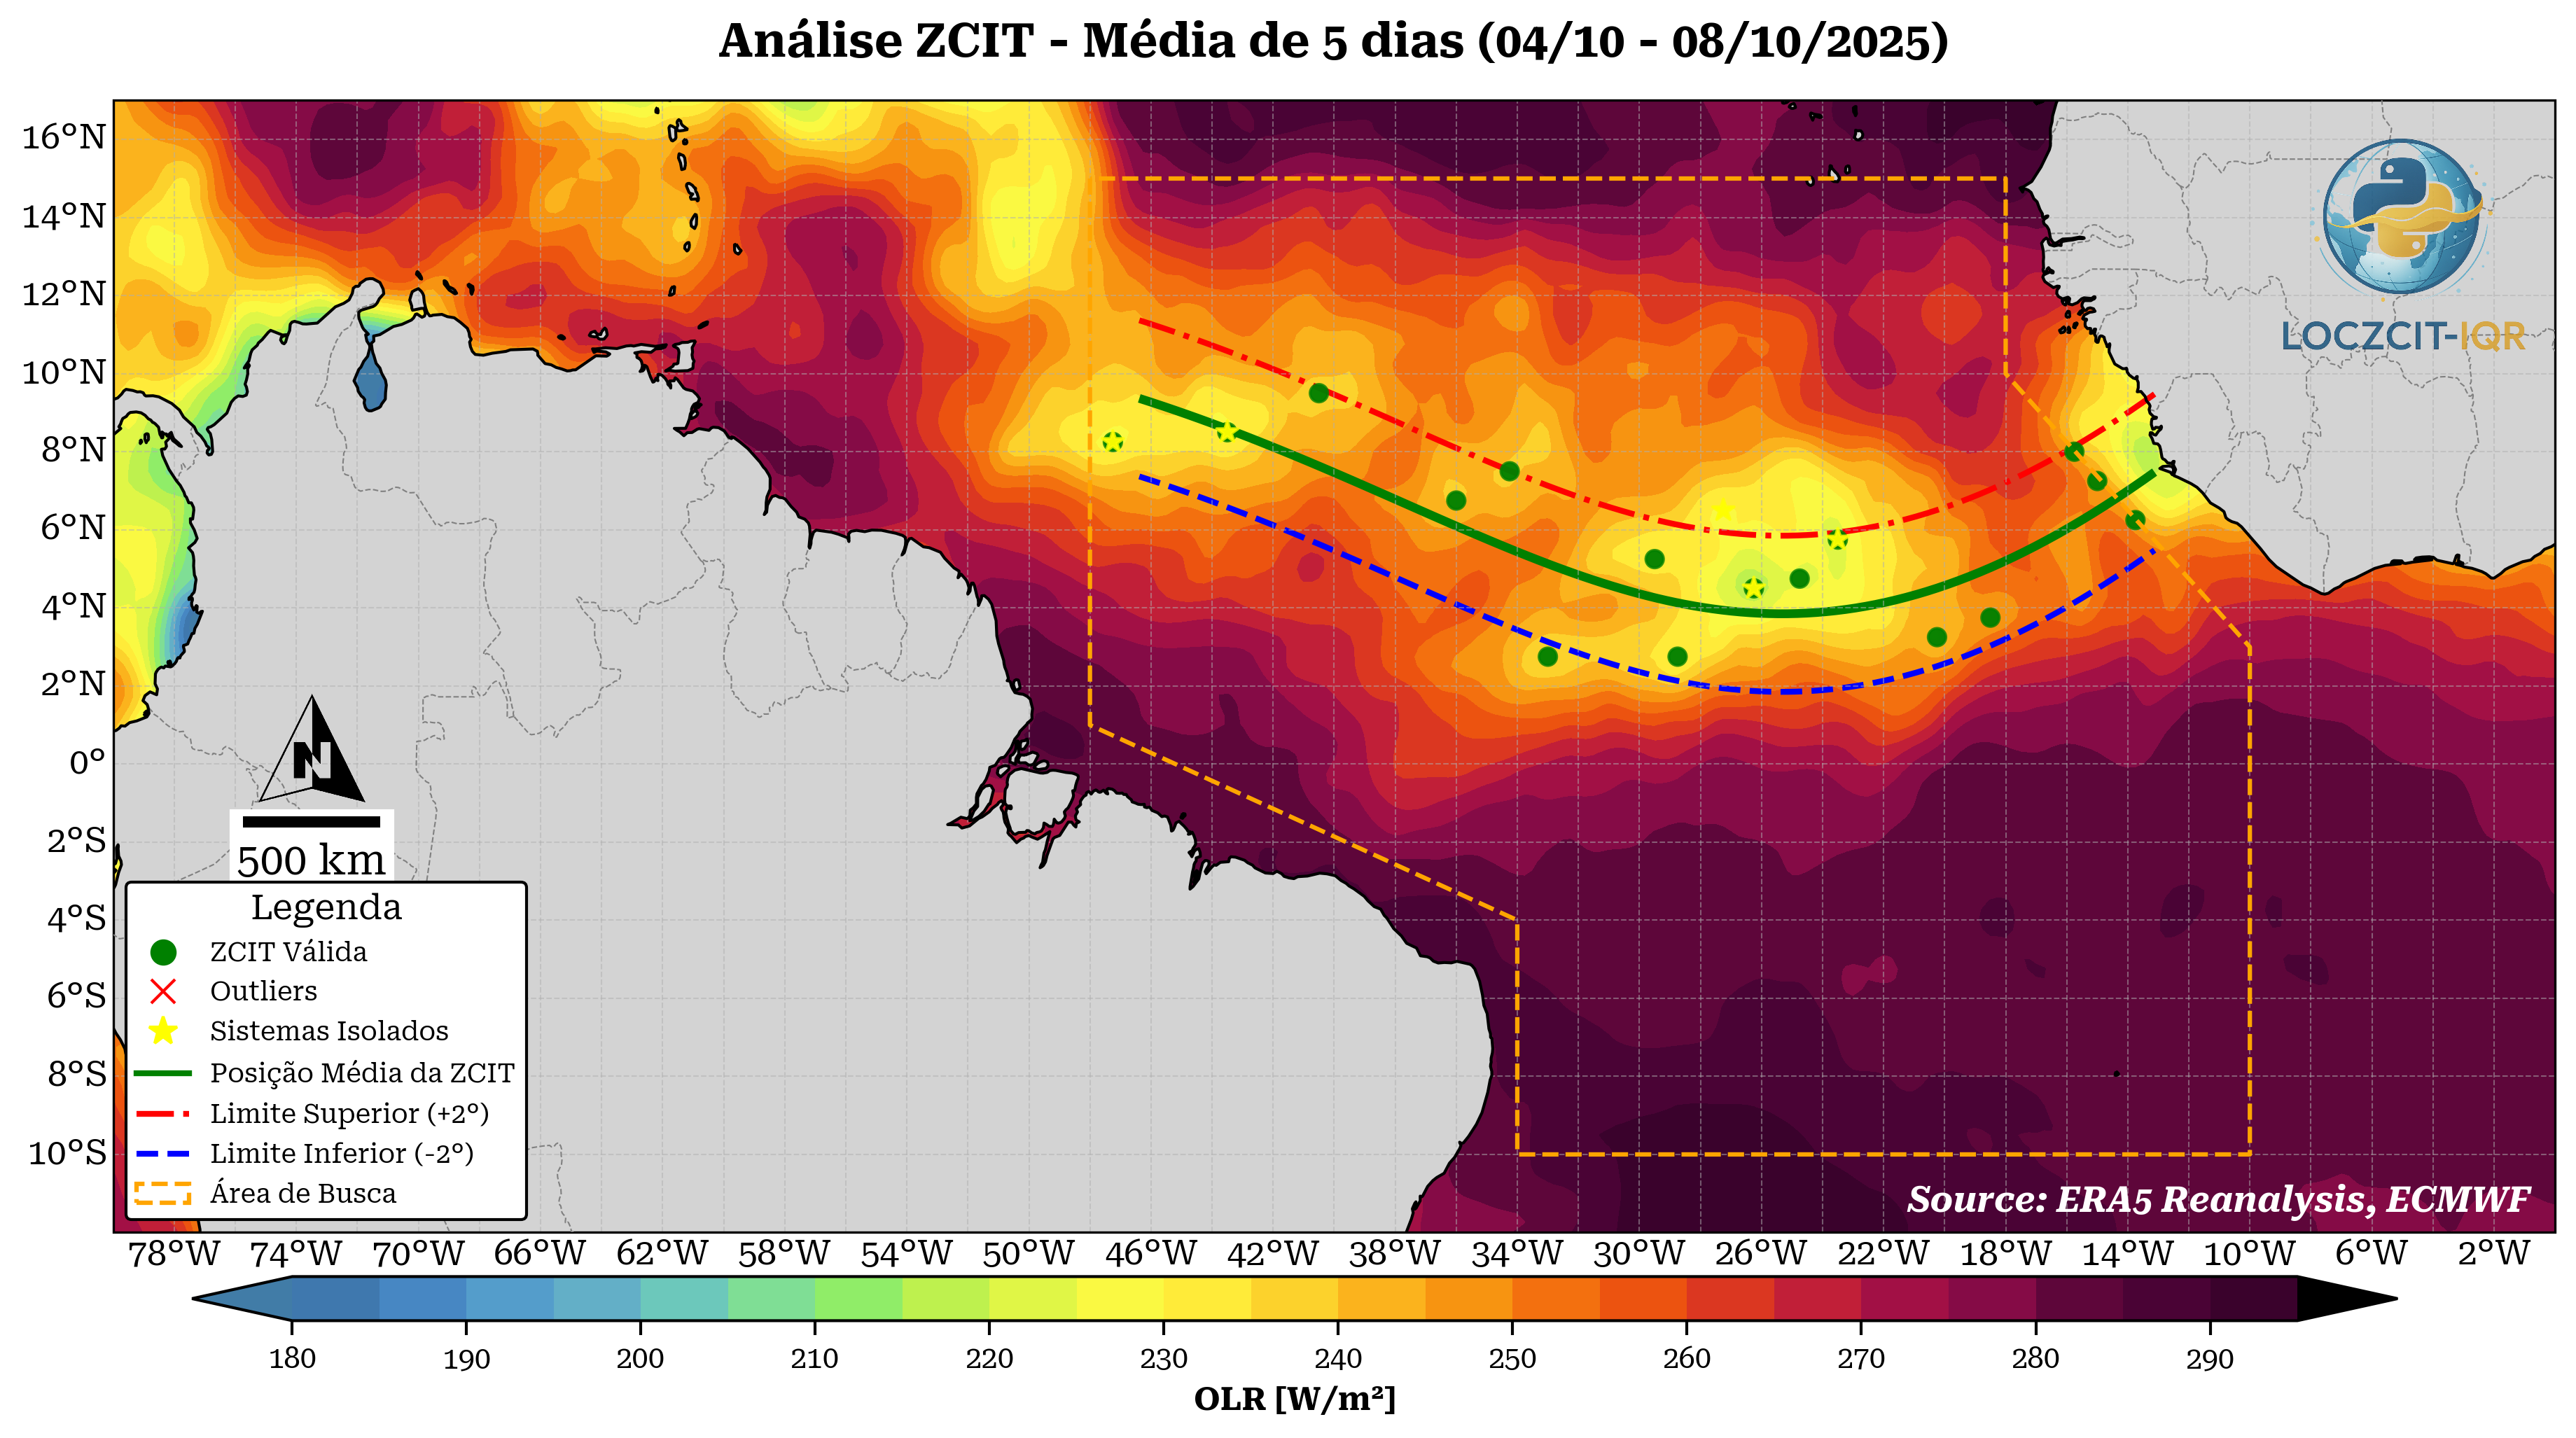

In [3]:
"""
Análise ZCIT Completa - Usando Dados ERA5
==========================================

MUDANÇAS EM RELAÇÃO AO CÓDIGO NOAA:
1. Import: NOAADataLoader → ERA5DataLoader
2. Inicialização: Adicionar credenciais CDS
3. Carregamento: Formato de data idêntico (YYYY-MM-DD)
4. Resto: IDENTICO! 🎉

Compatibilidade: 100% graças ao processor.py robusto
"""

# ============================================================================
# IMPORTS - ÚNICA DIFERENÇA: ERA5DataLoader em vez de NOAADataLoader
# ============================================================================

import pandas as pd
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

from loczcit_iqr.core.data_loader_era5 import ERA5DataLoader 
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import (
    SplineInterpolator, 
    SplineParameters, 
    InterpolationMethod
)
from loczcit_iqr.plotting.visualizer import ZCITVisualizer

# ============================================================================
# 0. CONFIGURAÇÃO DO ERA5 - CREDENCIAIS DO CLIMATE DATA STORE (CDS)
# ============================================================================
# Para baixar dados ERA5, você precisa de uma API Key da Copernicus.
#
# 0. Faça seu cadastro, passo-a-passo em: 
#    https://documentation.dataspace.copernicus.eu/Registration.html
#
# 1. Obtenha sua chave em: https://cds.climate.copernicus.eu/api-how-to
#
# 2. MÉTODO SEGURO (RECOMENDADO):
#    Crie um arquivo `.env` no mesmo diretório onde está executando o notebook
#    ou script de exemplo e adicione a linha (SUA CHAVE):
#       CDS_KEY=xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx 
#    O script carregará a chave automaticamente.
#
# 3. MÉTODO RÁPIDO (INSEGURO):
#    Substitua o valor da variável CDS_KEY abaixo pela sua chave.
#    ⚠️ Cuidado: Não faça isso se o código for compartilhado ou versionado.
# ============================================================================

CDS_URL = "https://cds.climate.copernicus.eu/api"

# ⚠️ Insira sua chave aqui (descomente a linha abaixo) ou, de preferência,
# defina-a em um arquivo .env

# MÉTODO RÁPIDO (INSEGURO):
#CDS_KEY =  "xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx"

# MÉTODO SEGURO (RECOMENDADO):
# --- Carregar credenciais do arquivo .env ---
# O path deve ser relativo ao local de onde você executa o notebook.
dotenv_path = os.path.join('notebooks', '.env')

load_dotenv(dotenv_path=dotenv_path)

CDS_KEY = os.getenv("CDS_KEY")

# ============================================================================
# 1. CARREGAMENTO E PROCESSAMENTO - QUASE IDÊNTICO AO NOAA
# ============================================================================
ano = 2025

# ⚠️ MUDANÇA 2: Inicializar com credenciais
loader = ERA5DataLoader(cds_url=CDS_URL, cds_key=CDS_KEY)

# Limpar TUDO 
loader.clear_cache(confirm=True)

processor = DataProcessor()

print(f"Carregando dados diários ERA5 para {ano}...")

# ✅ IDÊNTICO: Mesmo formato de data (YYYY-MM-DD)
olr_data = loader.load_data(
    start_date=f"{ano}-09-01", 
    end_date=f"{ano}-10-08"
)

print("\nCalculando a média de OLR para o período mais recente...")

# ✅ IDÊNTICO: Mesma função, mesmos parâmetros
olr_recente = processor.process_latest_period(olr_data, num_days=5)

print("Média recente calculada com sucesso.")

# ============================================================================
# 2. ANÁLISE DA ZCIT - COMPLETAMENTE IDÊNTICO AO NOAA
# ============================================================================
print(f"\nIniciando análise para o período recente...")

# ✅ Mesma detecção de outliers
detector = IQRDetector()
interpolator = SplineInterpolator()

# ✅ Mesma busca de mínimos
min_coords = processor.find_minimum_coordinates(
    data_array=olr_recente, 
    method='column_minimum', 
    search_radius=1
)

# ✅ Mesma detecção de outliers
coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)

# ✅ Mesma busca de sistemas convectivos
sistemas_convectivos = processor.find_minimum_coordinates(
    data_array=olr_recente, 
    threshold=230, 
    method='local_minimum', 
    search_radius=2
)

# ✅ Mesma interpolação
params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE, 
    smooth_factor='high', 
    degree=3, 
    num_points_output=100, 
    extrapolate_flag=True, 
    reference_latitude=0
)

zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)

print("Análise concluída.")

# ============================================================================
# 3. VISUALIZAÇÃO - COMPLETAMENTE IDÊNTICO AO NOAA
# ============================================================================

# --- Preparar o título ---
start_str = olr_recente.attrs['period_start']
end_str = olr_recente.attrs['period_end']
start_date_title = pd.to_datetime(start_str)
end_date_title = pd.to_datetime(end_str)

titulo_customizado = (
    f"Análise ZCIT - Média de 5 dias "
    f"({start_date_title.strftime('%d/%m')} - {end_date_title.strftime('%d/%m/%Y')})"
)

# --- Chamar o método "mestre" ---
viz = ZCITVisualizer(template='publication')

fig, ax = viz.plot_complete_analysis(
    olr_data=olr_recente,
    title=titulo_customizado,
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    credits="ERA5",
    save_path=None  # ou 'analise_zcit_era5.png' para salvar
)

# --- Mostrar o Gráfico ---
plt.show()

# Análise Por Pentadas Fixas

In [ ]:
from loczcit_iqr.utils.pentadas import show_pentadas_table

# Exibe a tabela para um ano não bissexto
show_pentadas_table(year=2025) # exemplo

--- Tabela de Pentadas para o Ano de 2025 ---
Pentada   | Data Início  | Data Fim     | Rótulo
--------------------------------------------------
1ª        | 01/01/2025   | 05/01/2025   | 01–05/Jan
2ª        | 06/01/2025   | 10/01/2025   | 06–10/Jan
3ª        | 11/01/2025   | 15/01/2025   | 11–15/Jan
4ª        | 16/01/2025   | 20/01/2025   | 16–20/Jan
5ª        | 21/01/2025   | 25/01/2025   | 21–25/Jan
6ª        | 26/01/2025   | 30/01/2025   | 26–30/Jan
7ª        | 31/01/2025   | 04/02/2025   | 31/Jan–04/Feb
8ª        | 05/02/2025   | 09/02/2025   | 05–09/Feb
9ª        | 10/02/2025   | 14/02/2025   | 10–14/Feb
10ª       | 15/02/2025   | 19/02/2025   | 15–19/Feb
11ª       | 20/02/2025   | 24/02/2025   | 20–24/Feb
12ª       | 25/02/2025   | 01/03/2025   | 25/Feb–01/Mar
13ª       | 02/03/2025   | 06/03/2025   | 02–06/Mar
14ª       | 07/03/2025   | 11/03/2025   | 07–11/Mar
15ª       | 12/03/2025   | 16/03/2025   | 12–16/Mar
16ª       | 17/03/2025   | 21/03/2025   | 17–21/Mar
17ª       | 22

In [ ]:
# Exibe a tabela para um ano bissexto para ver a diferença
show_pentadas_table(year=2024) # exemplo

--- Tabela de Pentadas para o Ano de 2024 ---
Pentada   | Data Início  | Data Fim     | Rótulo
--------------------------------------------------
1ª        | 01/01/2024   | 05/01/2024   | 01–05/Jan
2ª        | 06/01/2024   | 10/01/2024   | 06–10/Jan
3ª        | 11/01/2024   | 15/01/2024   | 11–15/Jan
4ª        | 16/01/2024   | 20/01/2024   | 16–20/Jan
5ª        | 21/01/2024   | 25/01/2024   | 21–25/Jan
6ª        | 26/01/2024   | 30/01/2024   | 26–30/Jan
7ª        | 31/01/2024   | 04/02/2024   | 31/Jan–04/Feb
8ª        | 05/02/2024   | 09/02/2024   | 05–09/Feb
9ª        | 10/02/2024   | 14/02/2024   | 10–14/Feb
10ª       | 15/02/2024   | 19/02/2024   | 15–19/Feb
11ª       | 20/02/2024   | 24/02/2024   | 20–24/Feb
12ª       | 25/02/2024   | 29/02/2024   | 25–29/Feb
13ª       | 01/03/2024   | 05/03/2024   | 01–05/Mar
14ª       | 06/03/2024   | 10/03/2024   | 06–10/Mar
15ª       | 11/03/2024   | 15/03/2024   | 11–15/Mar
16ª       | 16/03/2024   | 20/03/2024   | 16–20/Mar
17ª       | 21/03/

2025-10-17 12:36:59,696 - loczcit_iqr.core.data_loader_era5 - INFO - Cliente CDS inicializado com credenciais fornecidas
2025-10-17 12:36:59,697 - loczcit_iqr.core.data_loader_era5 - INFO - ERA5DataLoader inicializado (cache: era5_cache)
2025-10-17 12:36:59,699 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
Carregando dados diários ERA5 para 2024...
2025-10-17 12:36:59,699 - loczcit_iqr.core.data_loader_era5 - INFO - Carregando dados ERA5: 2024-01-01 a 2024-12-31
2025-10-17 12:36:59,700 - loczcit_iqr.core.data_loader_era5 - INFO - Iniciando download do CDS...
2025-10-17 12:36:59,701 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-01...
2025-10-17 12:36:59,702 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:37:00,633 INFO Request ID is 8dbf0b32-4169-43df-a806-3421d1346eea
2025-10-17 12:37:00,863 INFO status has been updated to accepted
2025-10-17 12:37:11,795 INFO status has been updated to running
2025-10-17 12:38:21,113 INFO status has been updated to successful
                                                                                         

2025-10-17 12:38:25,115 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_01.nc
2025-10-17 12:38:25,116 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-02...
2025-10-17 12:38:25,117 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:38:29,466 INFO Request ID is 0264fbc1-f0bc-4df5-86f0-2b24c1f3d821
2025-10-17 12:38:29,689 INFO status has been updated to accepted
2025-10-17 12:38:38,728 INFO status has been updated to running
2025-10-17 12:39:46,589 INFO status has been updated to successful
                                                                                         

2025-10-17 12:39:50,550 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_02.nc
2025-10-17 12:39:50,551 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-03...
2025-10-17 12:39:50,552 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:39:51,439 INFO Request ID is 991e464a-1a26-4fc1-8675-c9161e5b1b3b
2025-10-17 12:39:51,670 INFO status has been updated to accepted
2025-10-17 12:40:00,815 INFO status has been updated to running
2025-10-17 12:41:48,897 INFO status has been updated to successful
                                                                                         

2025-10-17 12:41:52,568 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_03.nc
2025-10-17 12:41:52,569 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-04...
2025-10-17 12:41:52,569 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:41:54,273 INFO Request ID is f4f9a23b-9c34-471f-b25a-b41d58eb01ac
2025-10-17 12:41:54,500 INFO status has been updated to accepted
2025-10-17 12:42:09,270 INFO status has been updated to running
2025-10-17 12:43:50,538 INFO status has been updated to successful
                                                                                         

2025-10-17 12:43:54,560 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_04.nc
2025-10-17 12:43:54,561 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-05...
2025-10-17 12:43:54,561 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:43:55,412 INFO Request ID is 91605b78-0dac-4ade-b914-bad921009e20
2025-10-17 12:43:55,623 INFO status has been updated to accepted
2025-10-17 12:44:10,212 INFO status has been updated to running
2025-10-17 12:45:52,326 INFO status has been updated to successful
                                                                                         

2025-10-17 12:45:55,973 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_05.nc
2025-10-17 12:45:55,974 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-06...
2025-10-17 12:45:55,975 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:45:57,076 INFO Request ID is 311aad83-b6f7-41d9-b09c-a56339ca38e7
2025-10-17 12:45:57,297 INFO status has been updated to accepted
2025-10-17 12:46:06,382 INFO status has been updated to running
2025-10-17 12:46:11,962 INFO status has been updated to accepted
2025-10-17 12:46:31,381 INFO status has been updated to running
2025-10-17 12:47:53,242 INFO status has been updated to successful
                                                                                         

2025-10-17 12:47:56,835 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_06.nc
2025-10-17 12:47:56,836 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-07...
2025-10-17 12:47:56,837 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:47:57,808 INFO Request ID is c49a804c-e823-4f85-b8aa-f21e20d65eb2
2025-10-17 12:47:58,241 INFO status has been updated to accepted
2025-10-17 12:48:12,826 INFO status has been updated to running
2025-10-17 12:50:52,808 INFO status has been updated to successful
                                                                                         

2025-10-17 12:50:56,746 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_07.nc
2025-10-17 12:50:56,747 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-08...
2025-10-17 12:50:56,748 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:51:00,039 INFO Request ID is 1a3490fc-645c-4d8c-b128-7bc45095c1ba
2025-10-17 12:51:00,739 INFO status has been updated to accepted
2025-10-17 12:51:15,246 INFO status has been updated to running
2025-10-17 12:52:57,073 INFO status has been updated to successful
                                                                                         

2025-10-17 12:53:00,843 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_08.nc
2025-10-17 12:53:00,844 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-09...
2025-10-17 12:53:00,845 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:53:02,515 INFO Request ID is 89b4cad9-0e69-4fa4-9a1a-185fa5750d94
2025-10-17 12:53:02,757 INFO status has been updated to accepted
2025-10-17 12:53:25,247 INFO status has been updated to running
2025-10-17 12:54:58,711 INFO status has been updated to successful
                                                                                         

2025-10-17 12:55:02,359 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_09.nc
2025-10-17 12:55:02,360 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-10...
2025-10-17 12:55:02,360 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:55:03,647 INFO Request ID is 191f9659-1b34-4fa1-8dc0-4028498aa705
2025-10-17 12:55:03,886 INFO status has been updated to accepted
2025-10-17 12:55:13,191 INFO status has been updated to running
2025-10-17 12:57:00,111 INFO status has been updated to successful
                                                                                         

2025-10-17 12:57:04,218 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_10.nc
2025-10-17 12:57:04,219 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-11...
2025-10-17 12:57:04,220 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:57:05,392 INFO Request ID is 4e5e803c-efe7-4fe6-bfae-a99e94c84e10
2025-10-17 12:57:05,618 INFO status has been updated to accepted
2025-10-17 12:57:14,727 INFO status has been updated to running
2025-10-17 12:59:01,353 INFO status has been updated to successful
                                                                                         

2025-10-17 12:59:05,133 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_11.nc
2025-10-17 12:59:05,134 - loczcit_iqr.core.data_loader_era5 - INFO - Baixando 2024-12...
2025-10-17 12:59:05,134 - loczcit_iqr.core.data_loader_era5 - INFO - Tentativa 1/3...


2025-10-17 12:59:06,179 INFO Request ID is 480472cc-e717-4392-9160-da0951073060
2025-10-17 12:59:06,396 INFO status has been updated to accepted
2025-10-17 12:59:15,412 INFO status has been updated to running
2025-10-17 13:00:23,697 INFO status has been updated to successful
                                                                                         

2025-10-17 13:00:27,298 - loczcit_iqr.core.data_loader_era5 - INFO - Download concluído: era5_cache\era5_temp_2024_12.nc
2025-10-17 13:00:27,298 - loczcit_iqr.core.data_loader_era5 - INFO - Concatenando múltiplos arquivos...
2025-10-17 13:00:27,299 - loczcit_iqr.core.data_loader_era5 - INFO - Concatenando 12 arquivo(s) mensal(is)...


2025-10-17 13:00:27,576 - loczcit_iqr.core.data_loader_era5 - INFO - Concatenação concluída: 366 dias
2025-10-17 13:00:27,577 - loczcit_iqr.core.data_loader_era5 - INFO - Salvando: era5_combined_20240101_20241231.nc
2025-10-17 13:00:28,750 - loczcit_iqr.core.data_loader_era5 - INFO - Limpando arquivos temporários...
2025-10-17 13:00:29,261 - loczcit_iqr.core.data_loader_era5 - INFO - ✅ Arquivo concatenado criado: era5_combined_20240101_20241231.nc
2025-10-17 13:00:29,266 - loczcit_iqr.core.data_loader_era5 - INFO - Carregando dados baixados...
2025-10-17 13:00:29,279 - loczcit_iqr.core.data_loader_era5 - INFO - Convertendo para formato NOAA...
2025-10-17 13:00:29,519 - loczcit_iqr.core.data_loader_era5 - WARNING -    ⚠️  .item() retorna <class 'int'>, mas sem .year
2025-10-17 13:00:29,520 - loczcit_iqr.core.data_loader_era5 - INFO - Salvando no cache: era5_cache\era5_olr_noaa_format_20240101_20241231_area_17.00_-80.00_-12.00_4.00.nc
2025-10-17 13:00:29,650 - loczcit_iqr.core.data_loade

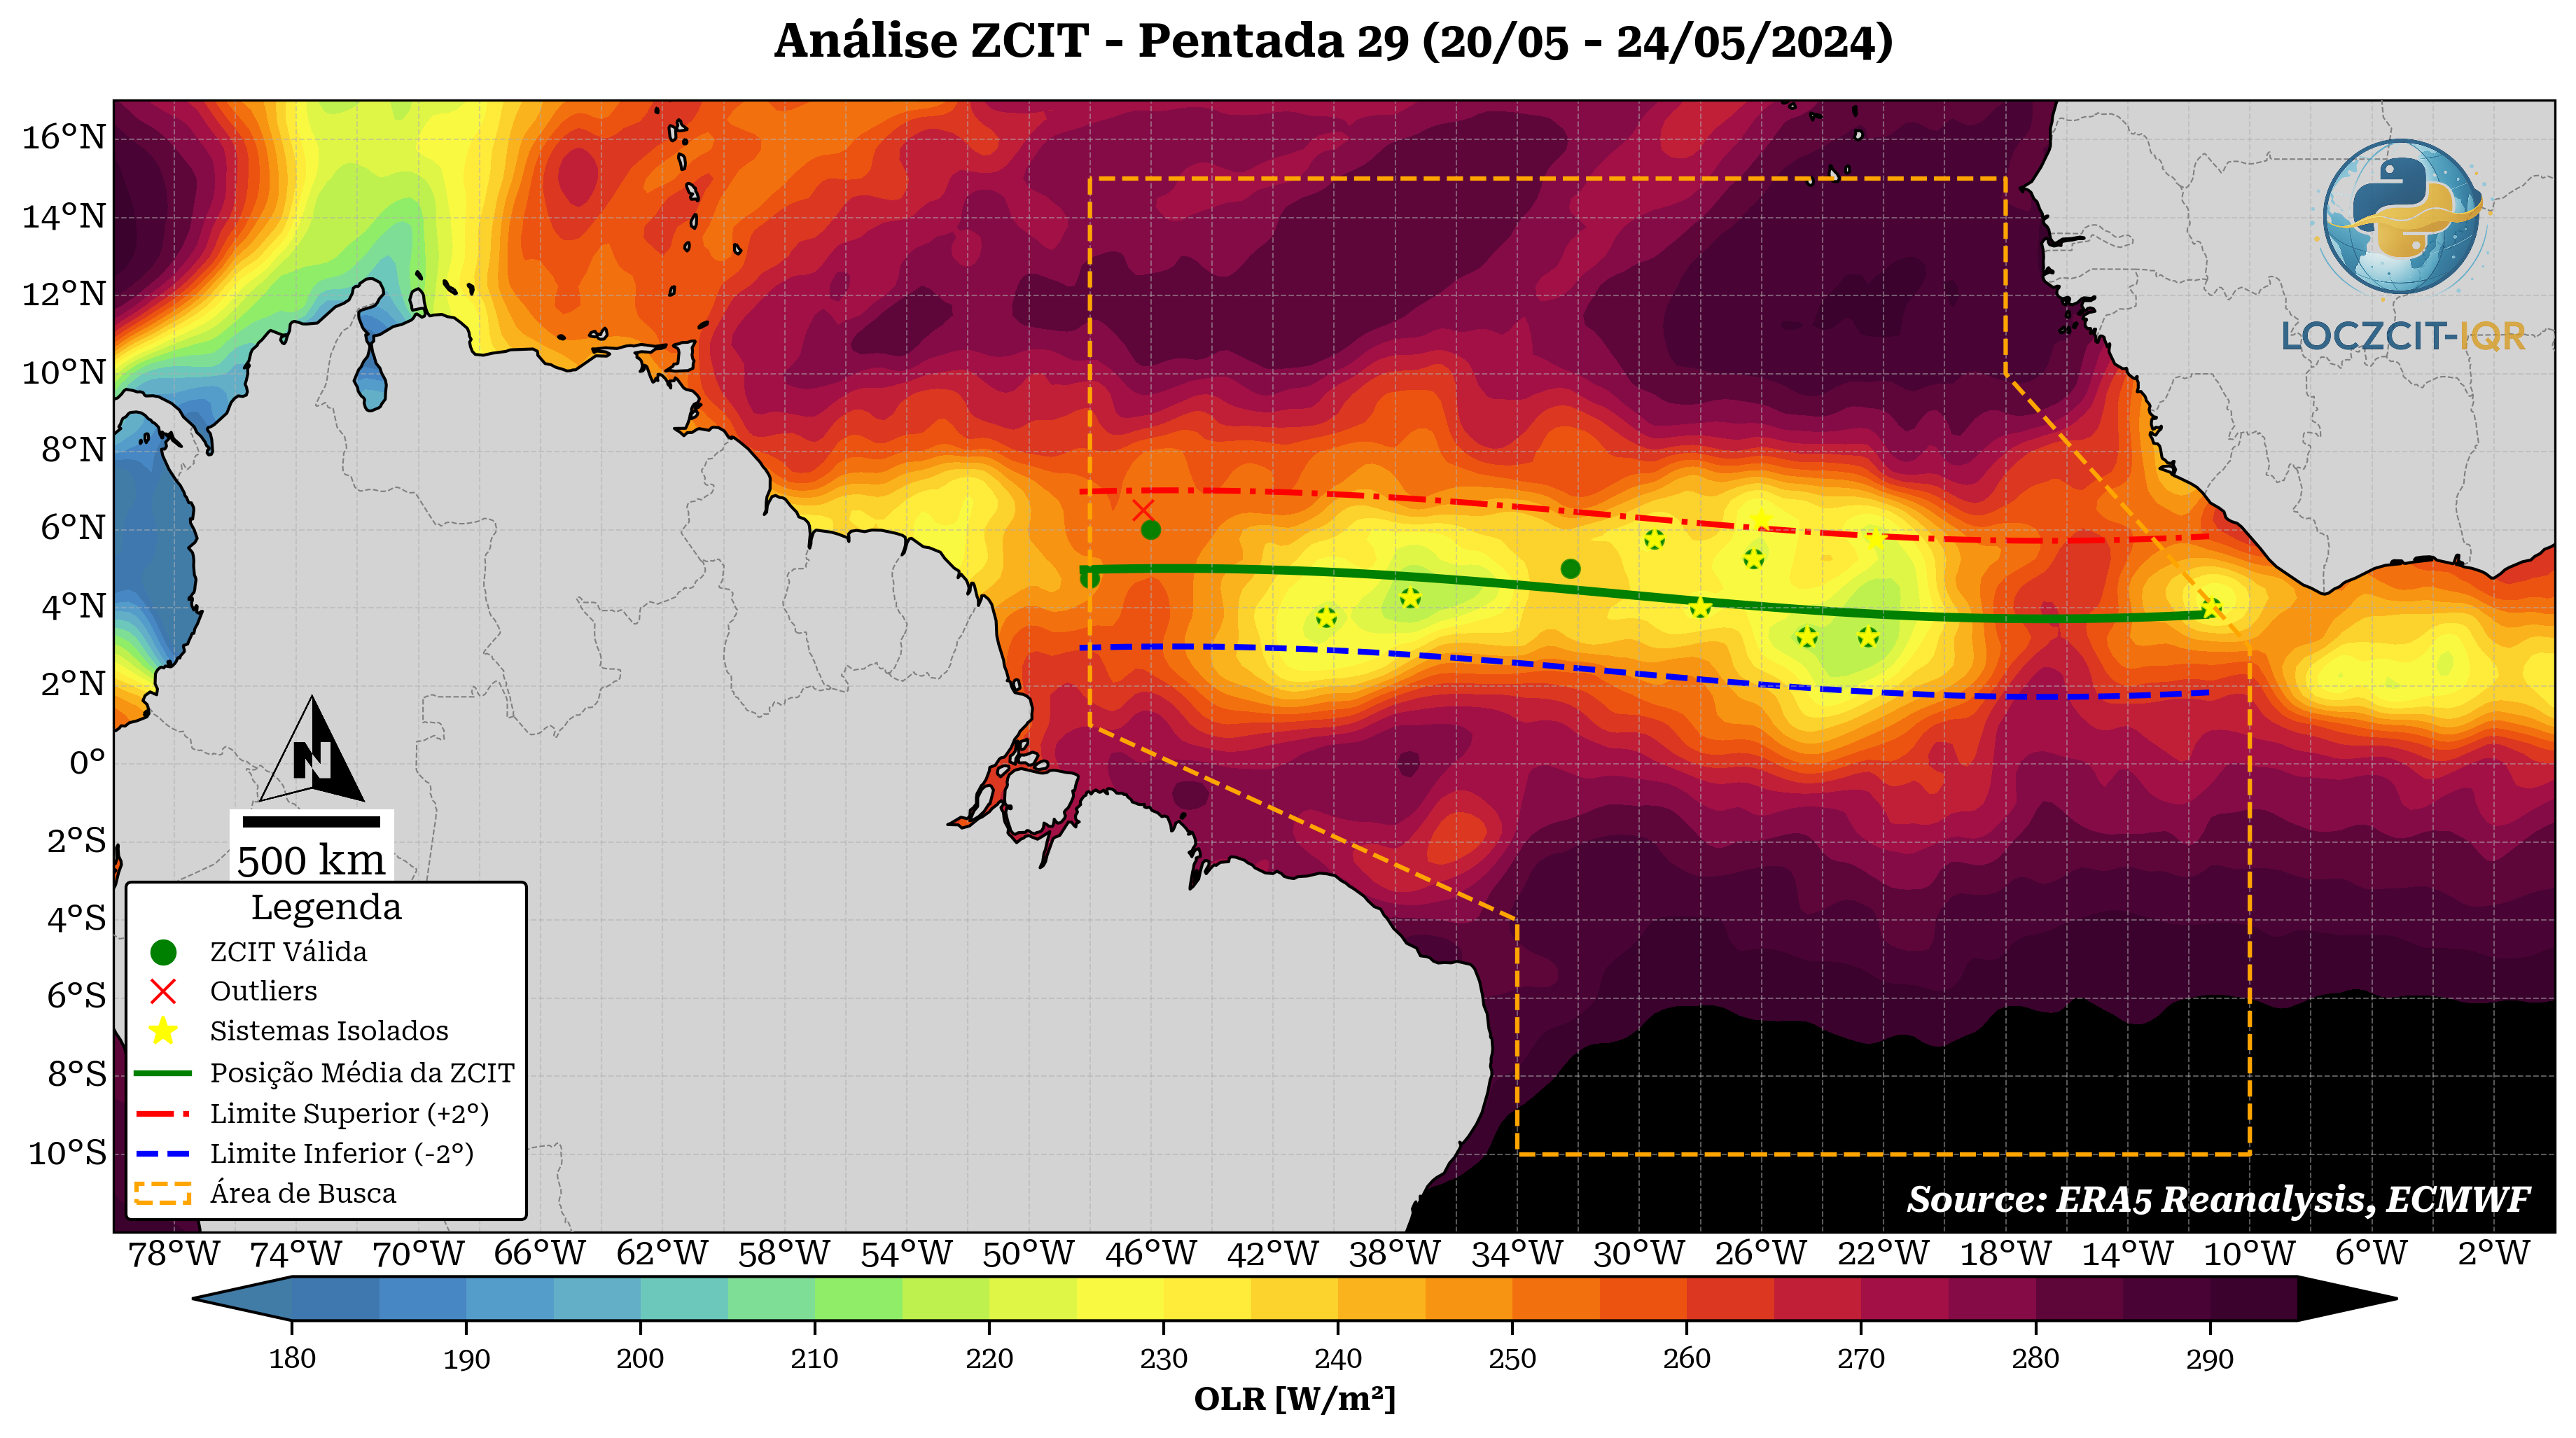

In [ ]:
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

from loczcit_iqr.core.data_loader_era5 import ERA5DataLoader 
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import (
    SplineInterpolator, 
    SplineParameters, 
    InterpolationMethod
)
from loczcit_iqr.plotting.visualizer import ZCITVisualizer

# ============================================================================
# 0. CONFIGURAÇÃO DO ERA5 - CREDENCIAIS DO CLIMATE DATA STORE (CDS)
# ============================================================================
# Para baixar dados ERA5, você precisa de uma API Key da Copernicus.
#
# 0. Faça seu cadastro, passo-a-passo em: 
#    https://documentation.dataspace.copernicus.eu/Registration.html
#
# 1. Obtenha sua chave em: https://cds.climate.copernicus.eu/api-how-to
#
# 2. MÉTODO SEGURO (RECOMENDADO):
#    Crie um arquivo `.env` no mesmo diretório onde está executando o notebook
#    ou script de exemplo e adicione a linha (SUA CHAVE):
#       CDS_KEY=xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx 
#    O script carregará a chave automaticamente.
#
# 3. MÉTODO RÁPIDO (INSEGURO):
#    Substitua o valor da variável CDS_KEY abaixo pela sua chave.
#    ⚠️ Cuidado: Não faça isso se o código for compartilhado ou versionado.
# ============================================================================

CDS_URL = "https://cds.climate.copernicus.eu/api"

# ⚠️ Insira sua chave aqui ou, de preferência, defina-a em um arquivo .env ⚠️

# MÉTODO RÁPIDO (INSEGURO):

# (descomente a linha abaixo e Insira sua chave aqui)
#CDS_KEY =  "xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx"

# MÉTODO SEGURO (RECOMENDADO):

# --- Carregar credenciais do arquivo .env ---
# O path deve ser relativo ao local de onde você executa o notebook.
dotenv_path = os.path.join('notebooks', '.env')

load_dotenv(dotenv_path=dotenv_path)

CDS_KEY = os.getenv("CDS_KEY")

# ============================================================================
# 1. CARREGAR E PROCESSAR DADOS DE PENTADAS
# ============================================================================
ano = 2024

# ⚠️ MUDANÇA: Inicializar com credenciais
loader = ERA5DataLoader(cds_url=CDS_URL, cds_key=CDS_KEY)
processor = DataProcessor()

print(f"Carregando dados diários ERA5 para {ano}...")

# ✅ IDÊNTICO ao NOAA: Mesmo formato de data
olr_data = loader.load_data(
    start_date=f"{ano}-01-01", 
    end_date=f"{ano}-12-31"
)

print("Criando pentadas a partir dos dados diários ERA5...")

# ✅ IDÊNTICO: Mesma função, mesmos parâmetros
pentads_year = processor.create_pentads(
    olr_data=olr_data, 
    year=ano,
    remove_leap_days=True,
    method='mean',
    min_days_required=3
)

# ============================================================================
# 2. ANÁLISE DA ZCIT - COMPLETAMENTE IDÊNTICO
# ============================================================================
PENTADA_ALVO = 29
detector = IQRDetector(constant=0.75)
interpolator = SplineInterpolator()

# ⚠️ Extrair o campo OLR 2D da pentada específica
olr_pentada = pentads_year['olr'].sel(pentada=PENTADA_ALVO)

min_coords = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=None,
    method='column_minimum',
    search_radius=1
)

coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)

sistemas_convectivos = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=230,
    method='local_minimum',
    search_radius=1
)

params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor='high',
    degree=3,
    max_curvature_threshold=30,
    num_points_output=100,
    extrapolate_flag=True,
    reference_latitude=0
)

zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)

# ============================================================================
# 3. CRIAR TÍTULO MANUALMENTE - COMPLETAMENTE IDÊNTICO
# ============================================================================
from loczcit_iqr.utils import pentada_to_dates

start_date, end_date = pentada_to_dates(PENTADA_ALVO, ano)
titulo_customizado = (
    f"Análise ZCIT - Pentada {PENTADA_ALVO} "
    f"({start_date.strftime('%d/%m')} - {end_date.strftime('%d/%m/%Y')})"
)

# ============================================================================
# 4. VISUALIZAÇÃO - ÚNICA MUDANÇA: credits="ERA5"
# ============================================================================
viz = ZCITVisualizer(template='publication')

fig, ax = viz.plot_complete_analysis(
    olr_data=olr_pentada,           # ✅ DataArray 2D
    title=titulo_customizado,        # ✅ Título customizado
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    credits="ERA5",                  
    save_path=None      
)

plt.show()